In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip "/content/data.zip" -d "/content"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Github/Quality Control Image Classifier/data.zip
replace /content/data/def_front/cast_def_0_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/def_front/cast_def_0_100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/data/def_front/cast_def_0_100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/def_front/cast_def_0_100.jpeg  
  inflating: /content/data/def_front/cast_def_0_1015.jpeg  
  inflating: /content/data/def_front/cast_def_0_102.jpeg  
  inflating: /content/data/def_front/cast_def_0_1046.jpeg  
  inflating: /content/data/def_front/cast_def_0_1053.jpeg  
  inflating: /content/data/def_front/cast_def_0_1055.jpeg  
  inflating: /content/data/def_front/cast_def_0_1077.jpeg  
  inflating: /content/data/def_front/cast_def_0_1087.jpeg  
  inflating: /content/data/def_front/cast_def_0_1091.jpeg  
  inflating: /content/data/def_front/cast_def_0_1104.jpeg

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
np.random.seed(1)
#Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#Keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, BatchNormalization
# from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras import regularizers

### Images size 512x512

In [ ]:
location = '/content/data'

In [ ]:
images_data = []
labels_data = []

In [ ]:
for img in os.listdir(f'{location}/def_front'):
  image = cv2.imread(f'{location}/def_front/{img}')
  image = cv2.resize(image, (128, 128))
  images_data.append(image)
  labels_data.append(1)

In [ ]:
for img in os.listdir(f'{location}/ok_front'):
  image = cv2.imread(f'{location}/ok_front/{img}')
  image = cv2.resize(image, (128, 128))
  images_data.append(image)
  labels_data.append(0)

In [ ]:
images_data, labels_data = shuffle(images_data, labels_data)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(images_data, labels_data, test_size=0.2)

In [ ]:
del images_data, labels_data

In [ ]:
train_x = np.array(train_x) / 255
train_y = np.array(train_y)
test_x = np.array(test_x) / 255
test_y = np.array(test_y)

In [ ]:
train_y = train_y.reshape(train_y.shape[0], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

In [ ]:
print("Shape of Images Train X:", train_x.shape)
print("Shape of Labels Train Y:", train_y.shape)
print()
print("Shape of Images Test X:", test_x.shape)
print("Shape of Labels Test Y:", test_y.shape)

Shape of Images Train X: (1040, 128, 128, 3)
Shape of Labels Train Y: (1040, 1)

Shape of Images Test X: (260, 128, 128, 3)
Shape of Labels Test Y: (260, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(200, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(100, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))

model.add(Conv2D(80, kernel_size=3, activation='relu'))
model.add(Conv2D(70, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))

model.add(Conv2D(60, kernel_size=3, activation='relu'))
model.add(Conv2D(50, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(1,1)))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))

model.add(Dense(35, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.99, epsilon=0.01))

model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.0001
opt = Adam(learning_rate=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 200)  │         5,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 100)  │       180,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 122, 122, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 122, 122, 100)  │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 122, 122, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 120, 120, 80)   │        72,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 118, 118, 70)   │        50,470 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 116, 116, 70)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 116, 116, 70)   │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 116, 116, 70)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 114, 114, 60)   │        37,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 50)   │        27,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 50)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 110, 110, 50)   │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 110, 110, 50)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 605000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 45)             │    27,225,045 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 45)             │           180 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         1,610 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 27,601,631 (105.29 MB)

 Trainable params: 27,601,001 (105.29 MB)

 Non-trainable params: 630 (2.46 KB)

In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, batch_size=32, epochs=50, validation_data=(test_x, test_y))

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6355 - loss: 0.7419 - val_accuracy: 0.4192 - val_loss: 0.7154
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 409ms/step - accuracy: 0.7470 - loss: 0.5563 - val_accuracy: 0.7231 - val_loss: 0.6572
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 419ms/step - accuracy: 0.7856 - loss: 0.5070 - val_accuracy: 0.6538 - val_loss: 0.6369
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 419ms/step - accuracy: 0.7807 - loss: 0.4618 - val_accuracy: 0.6769 - val_loss: 0.6483
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 396ms/step - accuracy: 0.8169 - loss: 0.4072 - val_accuracy: 0.6769 - val_loss: 0.6503
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 413ms/step - accuracy: 0.8238 - loss: 0.3858 - val_accuracy: 0.7346 - val_loss: 0.6053
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.8379 - loss: 0.3598 - val_accuracy: 0.7000 - val_loss: 0.5935
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 400ms/step - accuracy: 0.8591 - loss: 0.3468 - val_accurac

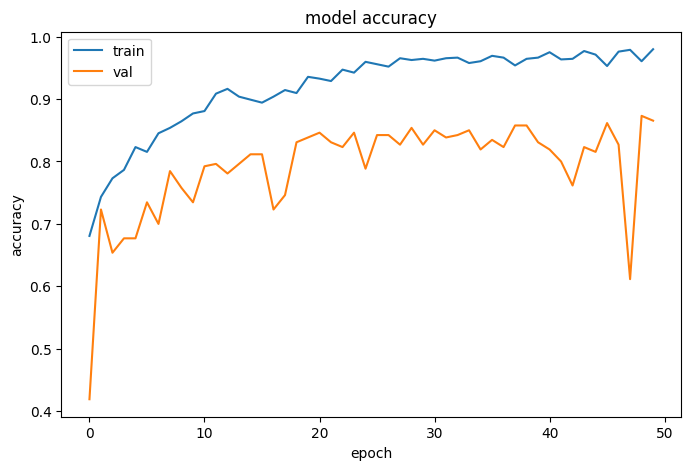



Accuracy on training set is 0.9798076748847961

Accuracy on test set is 0.8653846383094788


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
print("\nAccuracy on test set is {}".format(history.history["val_accuracy"][-1]))

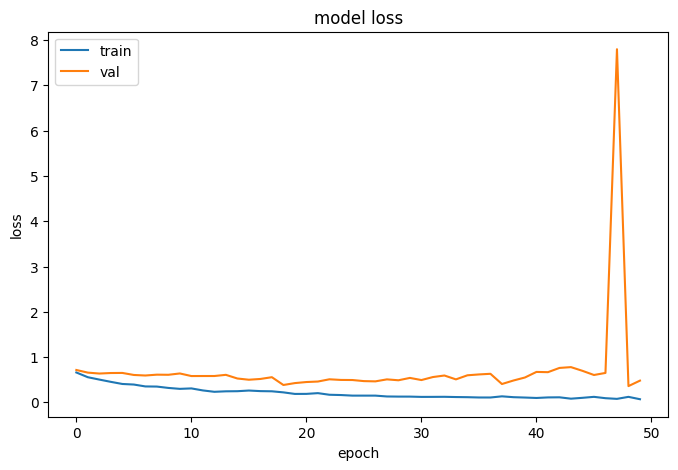



Accuracy on training set is 0.9798076748847961

Accuracy on test set is 0.8653846383094788


In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
print("\nAccuracy on test set is {}".format(history.history["val_accuracy"][-1]))